<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/ESAA_YB_week_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 p.669~698

# 10-3. 시본(Seaborn)

## 시각화를 위한 차트/그래프 유형

- 비즈니스 분석을 위한 시각화  
  - 청중의 유형과 수준 그리고 설득이 필요한 다양한 환경에 따라서 적절하게 여러 가지 차트를 활용하도록 발전
  - 비슷한 데이터 분석 결과를 상황에 따라 여러 차트로 표현

- 통계 분석을 위한 시각화
  - 데이터 자체가 가지는 특성에 좀 더 집중하는 경향
  - 비슷한 유형의 정보는 하나의 시각화 플롯으로만 표현하기도 함.


## 정보의 종류에 따른 시각화 차트 유형


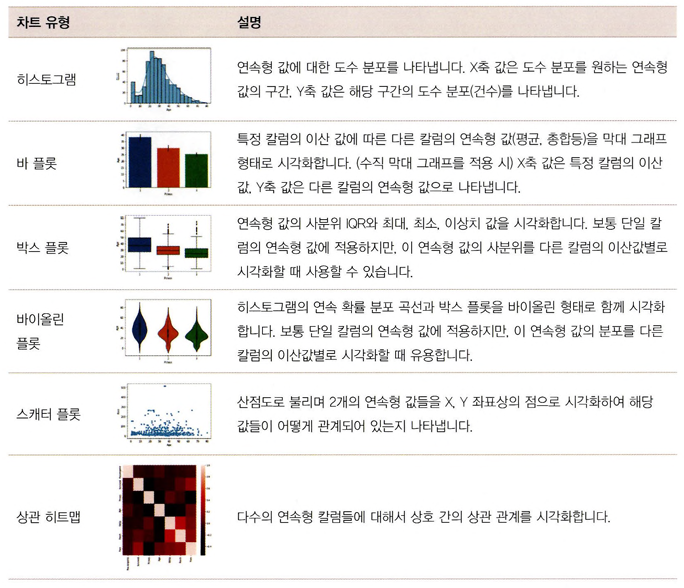


바 플롯: 특정 칼럼의 **이산 값을 기준**으로 다른 칼럼의 연속형 값을 막대 그래프로 시각화. (바 플롯 제외 모든 플롯들이 기본적으로 연속형 칼럼 값에 대한 시각화 지원함. )
히스토그램, 바이올린 플롯: 연속형 데이터의 분포가 **정규 분포인지 왜곡되어 있는지** 시각화  
박스 플롯: 연속형 데이터의 **분위**를 시각화
스캐터 플롯(산점도): 2개의 연속형 칼럼들에 대
한 **분포 및 관계**를 **점**으로 시각화  
상관 히트맵: 다수의 연속형 칼럼들의 **상관 관계**를 온도를 나타내는 **시각적인 컬러 기반**으로 표현

시본: X,Y축으로 구성된 이차원 축에서 데이터 시각화 -> 기본적으로 2개의 변수에 대한 정보 표출  
**hue 인자** 이용/플롯 유형 -> 연속형 데이터의 정보를 다른 이산형 데이터 값으로 세분화된 정보로 표현 가능. 3개의 변수도 함께 정보로 시각화 가능.

## 히스토그램(Histogram)

막대 차트처럼 보이지만 연속형 값을 범위 또는 구간으로 그룹화해 개별 구간에 해당되는 데이터의 건수를 시각화.  
기본적으로 한 개의 변수만 시각화.

 - histplot(): Axes 레벨 함수
 - displot(): Figure 레벨 함수

### histplot()

전체 figure 크기 조정은 맷플롯립과 마찬가지.  
hisplot(데이터, **bins=구간의 개수**, **kde=True**)  
- bins=구간의 개수
- kde=True: 연속 확률분포 곡선 표시

DataFrame을 입력값으로 받으면, 자동으로 칼럼명을 해석해서 X축명 또는 Y축명에 할당

대부분의 시각화 함수들은 data, x, y를 각각 인자로 가지는데, data 인자는 시각화 대상 DataFrame
객체, x 인자는 X축에 사용될 칼럼명, y 인자는 Y축에 사용될 칼럼명을 입력받음  
(히스토그램은 y인자 생략)




In [4]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving titanic_train.csv to titanic_train (1).csv


In [5]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


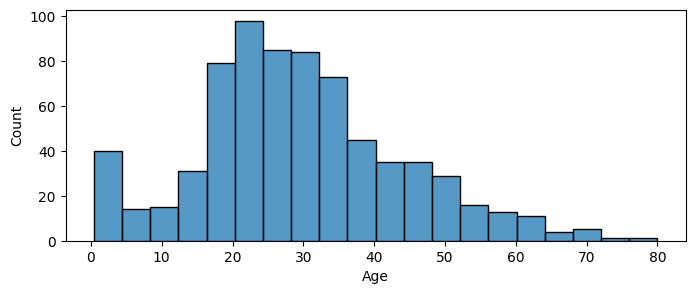

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8,3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'], bins=20)
plt.show()

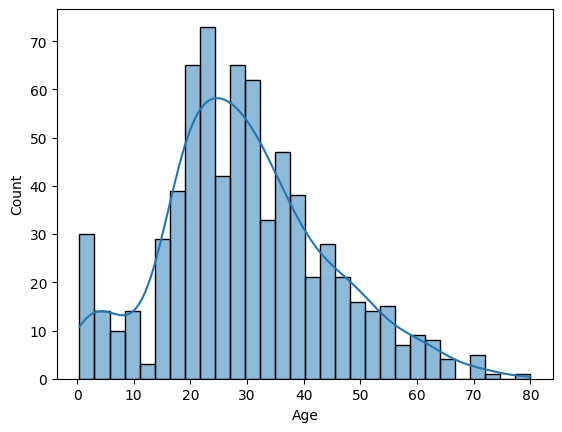

In [9]:
sns.histplot(x='Age', data=titanic_df, bins=30, kde=True)
plt.show()

### displot()

Figure 레벨 함수
- 맷플롯립 API 사용을 최소화
- 기본 맷플롯립에서 사용하는 기능들을 Figure 레벨 함수의 인자 등으로 대체하게 설계됨
-> 그래프 세부 변경을 유연성 있게 적용하기 어려움.  
- 여러 시각화 함수들을 한 번에 시각화 할 수 있음.

ex.  Figure의 크기는 더 이상 plt.figure()로 조절 불가, 해당 함수에서 인자로 Figure의 크기를 조절해야 함.

  - height: 세로(높이)의 크기
  - aspect: 가로와 세로의 배율  
  ~(width 등 별도 가로(너비) 크기 설정 인자 X)~  
  자동으로 height * aspect = 가로의 크기로 결정됨.  





<Figure size 800x400 with 0 Axes>

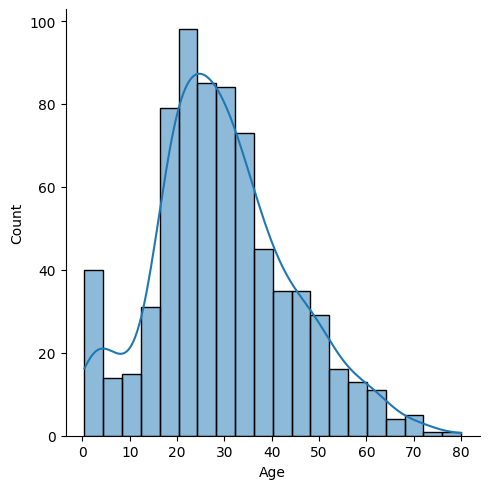

In [10]:
import seaborn as sns

# seaborn의 figure 레벨 그래프는 plt.figure()로 Figure 크기를 조절할 수 없습니다.
plt.figure(figsize=(8,4)) # 가로8, 세로4 설정했지만 적용 안 됨.
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

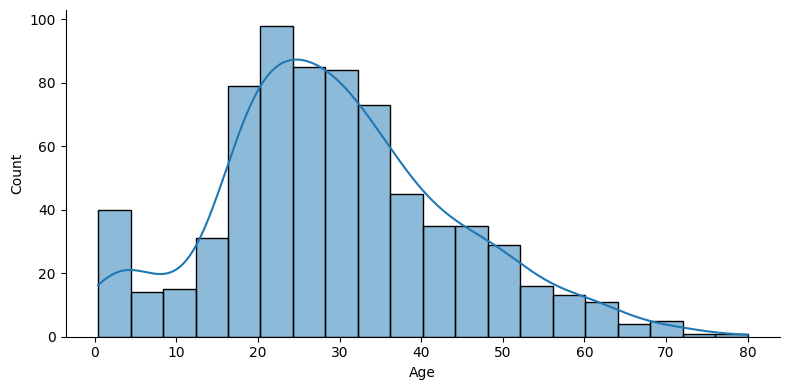

In [11]:
import seaborn as sns

sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()

## 카운트 플롯

이산형 값의 건수를 막대 그래프 형태로 시각화  
-> 주로 카테고리성 칼럼 값별 건수를 시각화  

**`countplot()`**

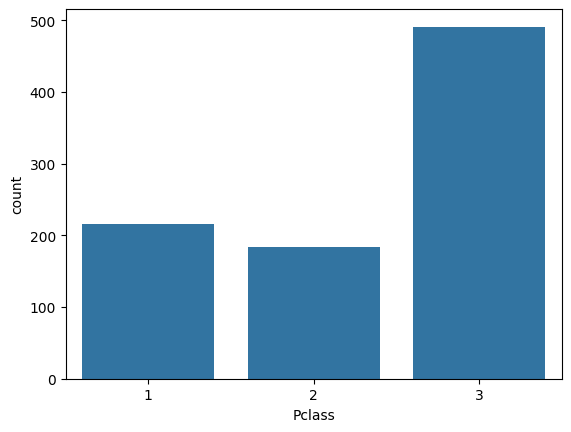

In [12]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

## 바 플롯(barplot)

막대 그래프 형태의 플롯.  
2차원 축 기반의 시각화에 널리 활용됨. 이산형 값 종류가 너무 많지 않을 때 유용하게 사용됨.

**`barplot()`**

- orient 인자: v는 수직, h는 수평.
  별도 설정 X -> 데이터 유형 판단해 자동으로 유형 변환해줌. 둘 다 숫자형 값일 경우 수직막대그래프 우선함.
수직 막대 그래프 가정)
- X축 값: 이산형 값
- Y축 값: 연속형 값
  - 평균 (default)
  - 총합 : estimator=sum 인자 설정.
  - 중앙값

0,1 이산값 사용시 -> 평균값 = 평균 비율 나타냄. / 총합 = 총 개수 나타냄.  
x,y 축 모두 이산값 -> 바 플롯 정보 시각적 오해할 가능성 O.  
x,y 축 모두 문자열 값 -> 오류 발생




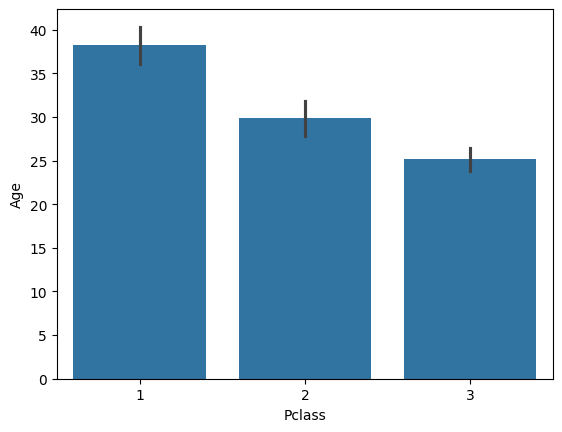

In [14]:
# 자동으로 xlabel, ylabel을 barplot()의 x 인자값인 Pclass, y 인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

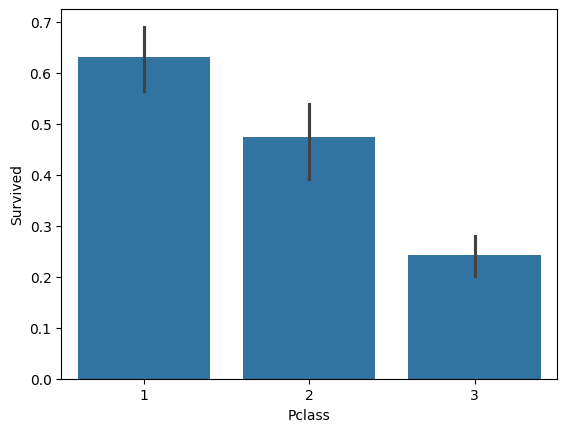

In [15]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()

## barplot() 함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기

2차원 평면 형태 시각화는 2개의 정보를 시각화해줌.  
**hue 인자** 이용하면 세부 정보 추가 전달 가능. 3개의 정보 전달.  

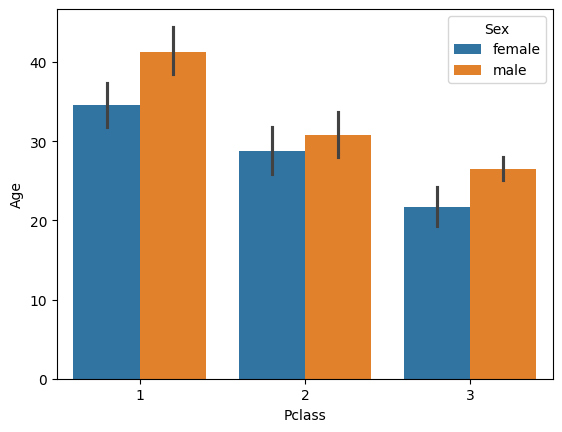

In [17]:
# 아래는 Pclass가 x축 값이며 hue 파라미터로 Sex를 설정.
# 개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

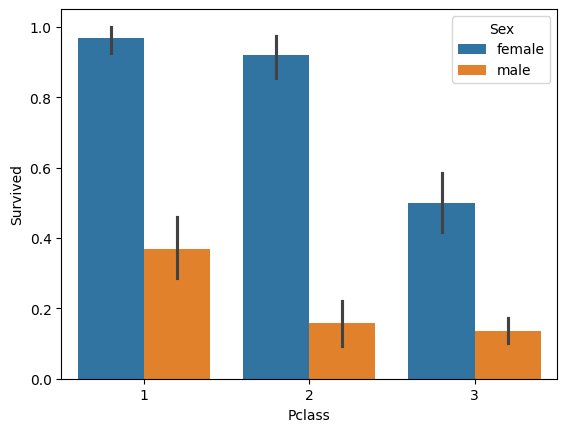

In [18]:
# 개별 Pclass 값별로 Sex에 따른 Survived 평균 값을 구함.
# Pclass가 x축 값이며 Survived가 Y축 값. hue 파라미터로 Sex를 설정.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

## 박스 플롯

상자 수염 그래프: 상자 형태로 생긴 몸통 부분 +  위, 아래로 길
게 이어진 수염 형태  

**`boxplot()`**
인자: x, y, data

연속형 값에 대한 IQR분위, 최소/최대, 이상치 정보를 시각화  
(분위수 기반 -> 연속형 값에 적용해야 의미 있는 정보가 됨)

- 단일 칼럼에 대한 분위수가 기본.  
연속형 값 y에 입력 시 수직 박스 플롯 / x에 입력 시 수평 박스 플롯
- 여러 칼럼별로 분위수 나타낼 때: 남은 인자에 반드시 **이산형 값** 입력.
- hue 인자 적용 가능



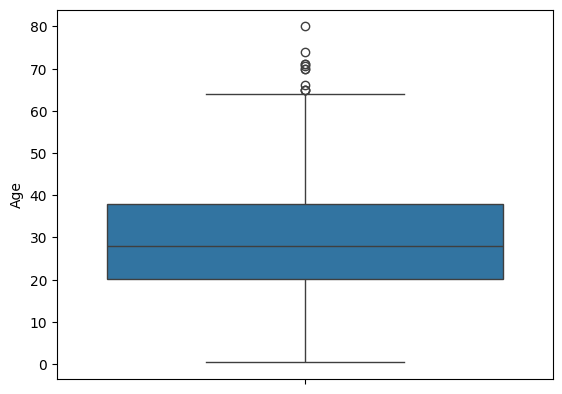

In [19]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

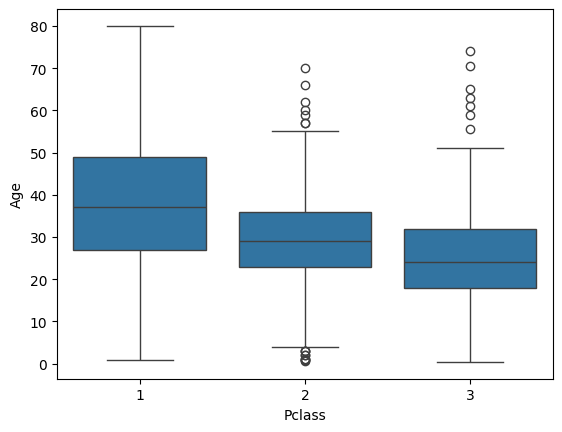

In [20]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

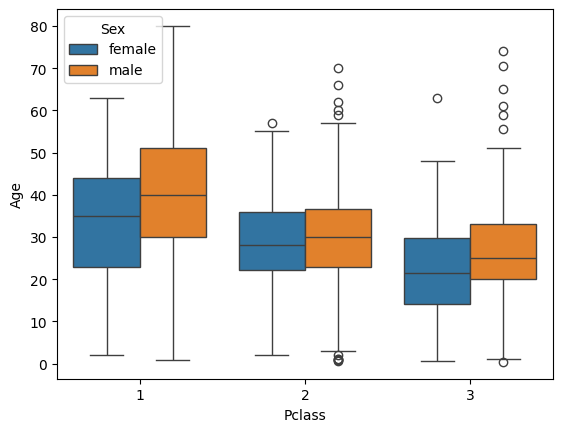

In [22]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

## 바이올린 플롯

히스토그램의 연속 확률 분포 곡선과 박스 플롯을 함께 시각화

**`violinplot()`**

boxplot과 유사하게 연속형 값에 적용해야 의미 있는 정보로 시각화됨  

- 연속형 값을 y에 입력 시 수직 바이올린 플롯을, x에 입력 시 수평 바이올린 플롯
- 여러 이산값별로 여러 개의 바이올린 플롯 그릴 수 O -> 여러개의 히스토그램 연속 확률 분포 곡선들 그려줌. 데이터분포도 효과적 시각화, 비교 훨씬 쉬움
- hue 인자 사용 가능

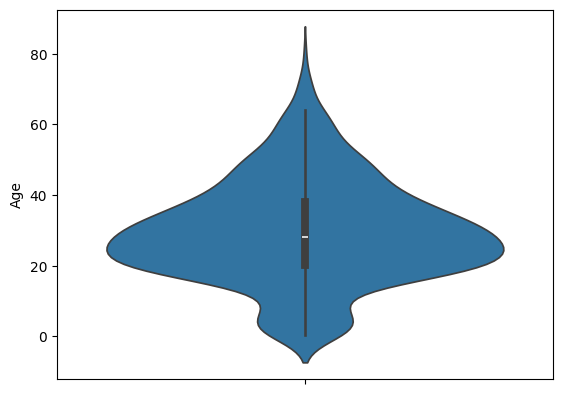

In [23]:
# Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

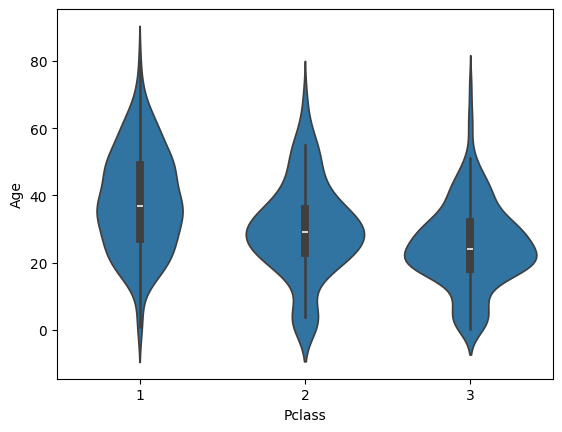

In [24]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# Pclass값별 Age 데이터 분포를 비교하여 볼 수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

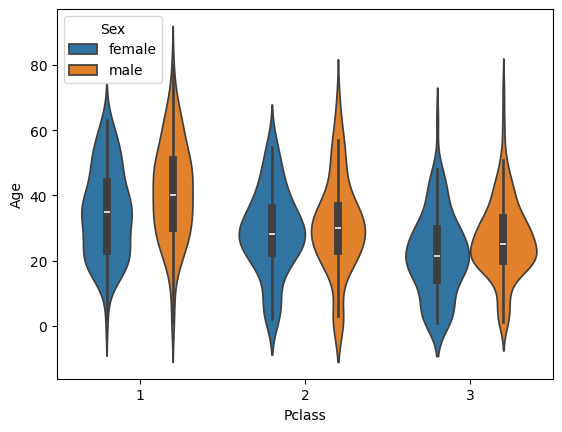

In [25]:
# x축값인 개별 Pclass의 내에서 Sex값별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

## subplots를 이용하여 시본의 다양한 그래프를 시각화

모든 Axes레벨 시각화 함수는 ax 인자 가짐.
ax 인자에 개별 Axes 객체를 할당해, 해당 위치의 subplot에 카운트플롯을 시각화  
`sns.countplot(x=칼럼명, data=DataFrame, ax=axs[0])`

칼럼들을 리스트 형태로 생성한 뒤 ncols에 할당할 수 O

여러 개의 서브플롯을 이용하면 여러 개 칼럼들에 대한 시각화 정보를 한꺼번에 확인하고 비교 가능, 단일 플롯을 사용할 때보다 더욱 유용하게 활용 가능.  
개별 피처 칼럼들이 서로 다른 타깃값별로 어떻게 구성되고 데이터가
분포되는지 확인하는 작업 중요!

index: 0
index: 1
index: 2


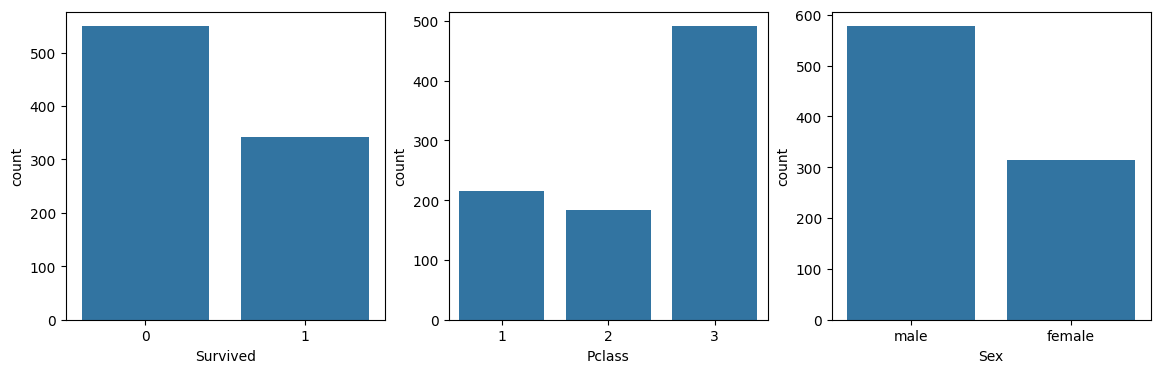

In [27]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
  print('index:', index)
  # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
  sns.countplot(x=column, data=titanic_df, ax=axs[index])

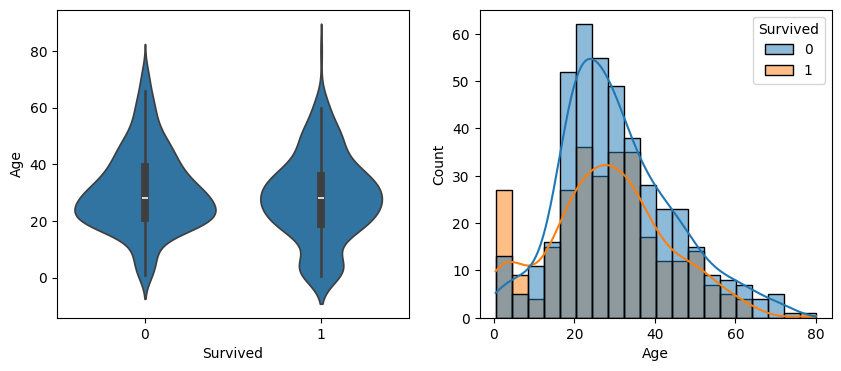

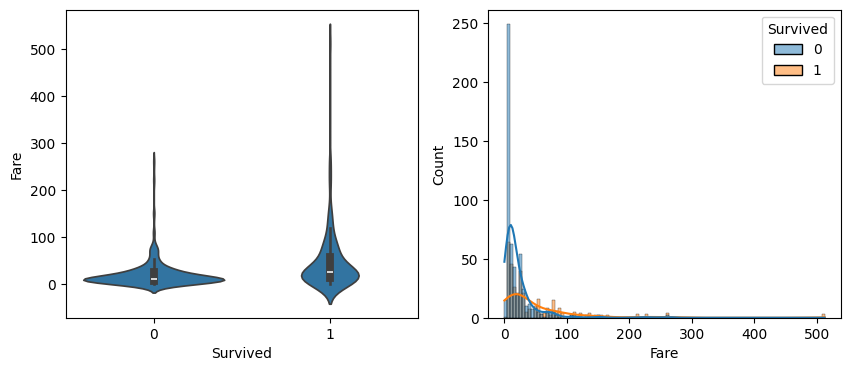

In [28]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in cont_columns:
  # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화. nrows는 1, ncols=2인 서브플롯 생성.
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
  # 왼쪽 Axes 객체에는 Survived값 0,1별 개별 칼럼의 바이올린 플롯 시각화.
  sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
  # 오른쪽 Axes 객체에는 Survived 값에 따른 개별 칼럼의 히스토그램 시각화
  sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

## 산점도, 스캐터 플롯(Scatter Plot)

좌표상에 점을 표시하여 변수 간의 관계 표현

**`scatterplot()`**

- X,Y축 값 모두 연속형 숫자값을 적용해야 의미 있는 시각화
정보를 얻을 수 있음
- hue 인자
- **style 인자**: 모양으로도 구분 가능




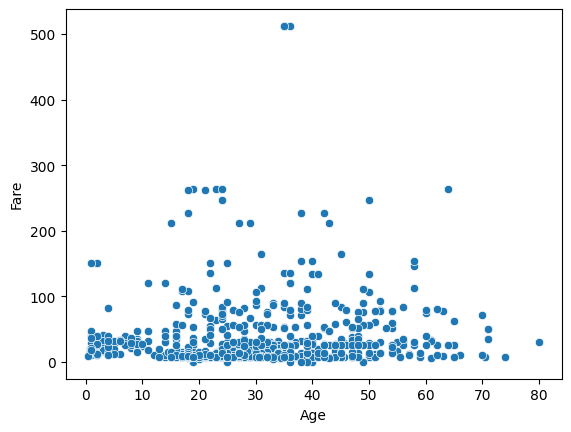

In [29]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

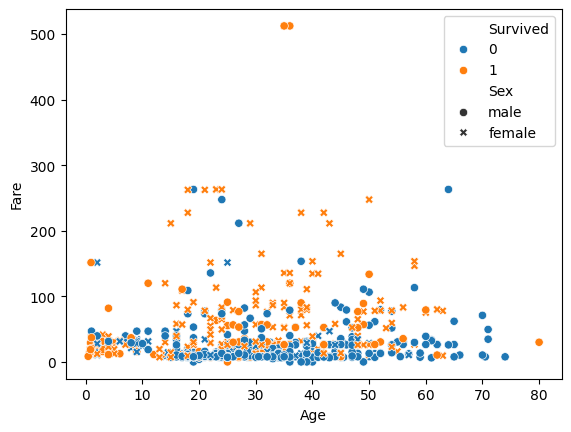

In [30]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

## 상관 히트맵(Correlation Heatmap)

다수의 속성들 간의 상관계수를 히트맵 형태로 여러 가지 색상으로 표현하여, 직관적으로 칼럼들 간의 상관도를 이해 가능. 수치값을 온도를 연상시키는 다양한 색상으로 표현.
칼럼들이 매우 많을 때 활용도 매우 높음.    
히트맵(Heatmap): 열을 의미하는 히트(Heat) + 지도를 의미하는 맵(map)  

상관계수)
두 속성(변수/칼럼/피처)들 간의 선형적인 연관 관계를 수치화한 값. 일반적으로 **연속형 숫자값**에서 해석되어야함.   
- 서로 상관없으면 0
- 같은 방향으로 완전히 동일하면 1
- 함께 증가: 양의 상관 관계, 상관도가 높을수록 1에 가까워짐
- 반대 방향으로 완전히 동일하면 -1
- 반대 경향: 음의 상관 관계, 상관도가 높을수록 -1에 가까워짐

**`heatmap()`**

인자로 칼럼들 간의 상관계수를 가지는 DataFrame을 입력받아야 시각화가 가능함.  
-> corr() 메서드 호출, 숫자형 칼럼들의 상관계수만 계산해 칼럼과 칼럼 간의 상관계숫값을 행과 열로 매핑함

맨 오른쪽에는 상관계숫값(-1~1)의 색깔 기준이 표현되어 있음.  
-1(검정) ~ 0(빨강) ~ 1(밝은 베이지)  그라데이션.  
가운데 대각선 부분은 자기자신과의 상관계숫값, 모두 1, 밝은 베이지색.  

- cmap 인자: color map, 색상 변경 가능. 'rocket'(default), 검빨베이지
- annot 인자
  - True: 숫자로 된 상관계숫값 표시,
    - fmt 인자: 숫자값의 포맷 변환. fmt='.1f'는 소수점 한 자리까지만 표시.
  - False(default): 생략.
- cbar 인자
  - True(default): 숫자값에 따른 색깔 기준 막대 표시
  - False: 표시X




In [36]:
corr_df = titanic_df.corr(numeric_only=True) # 데이터프레임 내의 숫자형(numeric) 열만 자동으로 선택하여 상관계수를 계산하도록 지시
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


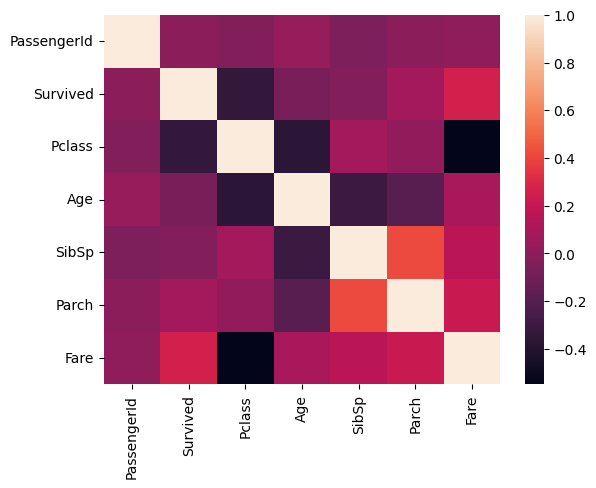

In [38]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr_df = titanic_df.corr(numeric_only=True)
sns.heatmap(corr_df)
plt.show()

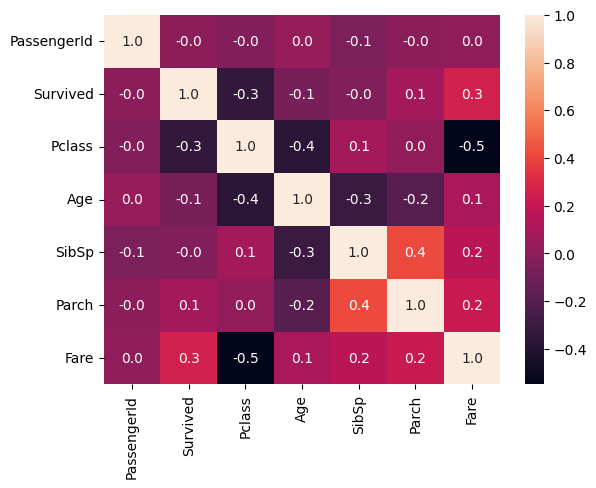

In [39]:
sns.heatmap(corr_df, annot=True, fmt='.1f', cbar=True)
plt.show()

# 10-4. 정리

Figure는 그림을 그리기 위해 그림판의 크기를 조절하는 역할만 수행
실질적으로 그림을 그리는 역할은 Axes에서 수행

plt.subplots() 함수를 이용하면 여러 개의 서브플롯들을 생성 가능  
이때 할당되는 Axes 객체를 튜플이나 배열
인덱스로 접근할 수 있음  
시각화는 개별 서브플롯별로 할당된 Axes 객체의 시각화 함수들을 호출

시본은 판다스 DataFrame과 유연하게 통합됨. 축명이나 범례 등을 자동 설정 가능.  
 히스토그램, 카운트 플롯, 바 플롯, 박스 플롯, 바이올린 플롯, 스캐터
플롯, 상관 히트맵 등 ...   
hue 인자 활용  


